# Fundamentals of Vector Data in Python

## Import shapefile Data into Python using Geopandas

In [1]:
# Import Packages
import os

import matplotlib.pyplot as plt
import geopandas as gpd
import earthpy as et

In [8]:
# Download the data and set working directory
et.data.get_data(key="spatial-vector-lidar")


# Set working directory - earthpy creates earth-analytics for you in your home dir
os.chdir(os.path.join(et.io.HOME, "earth-analytics"))

Extracted output to C:\Users\Gabriel\earth-analytics\data\spatial-vector-lidar\.


In [11]:
os.getcwd()

'C:\\Users\\Gabriel\\earth-analytics'

In [15]:
coastlines_path = os.path.join(
    "data", "earthpy-downloads", "ne_50m_coastline", "ne_50m_coastline.shp"
)

coastlines = gpd.read_file(coastlines_path)
coastlines.head()

,scalerank,featurecla,min_zoom,geometry
0,0,Coastline,1.5,"LINESTRING (180 -16.15293, 179.84814 -16.21426..."
1,0,Coastline,4.0,"LINESTRING (177.25752 -17.0542, 177.2874 -17.0..."
2,0,Coastline,4.0,"LINESTRING (127.37266 0.79131, 127.35381 0.847..."
3,0,Coastline,3.0,"LINESTRING (-81.32231 24.68506, -81.42007 24.7..."
4,0,Coastline,4.0,"LINESTRING (-80.79941 24.84629, -80.83887 24.8..."


- Plot Global coastline boundaries

<bound method Figure.show of <Figure size 1200x600 with 1 Axes>>

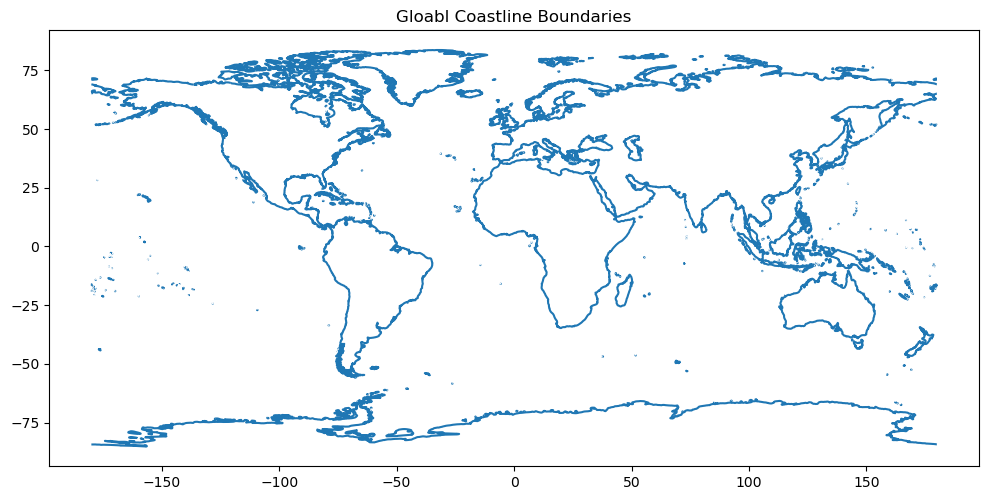

In [16]:
f, ax = plt.subplots(figsize=(12, 6))
coastlines.plot(ax=ax)
ax.set(title="Gloabl Coastline Boundaries")
f.show

* Check the Spatial Vector DataType

In [17]:
# Is the geometry type point, line or polygon?
coastlines.geom_type

0       LineString
1       LineString
2       LineString
3       LineString
4       LineString
           ...    
1423    LineString
1424    LineString
1425    LineString
1426    LineString
1427    LineString
Length: 1428, dtype: object

In [18]:
coastlines.info()

<class 'geopandas.geodataframe.GeoDataFrame'>
RangeIndex: 1428 entries, 0 to 1427
Data columns (total 4 columns):
 #   Column      Non-Null Count  Dtype   
---  ------      --------------  -----   
 0   scalerank   1428 non-null   int64   
 1   featurecla  1428 non-null   object  
 2   min_zoom    1428 non-null   float64 
 3   geometry    1428 non-null   geometry
dtypes: float64(1), geometry(1), int64(1), object(1)
memory usage: 44.8+ KB


### **Open Vector Point Data**

In [19]:
populated_places_path = os.path.join(
    "data",
    "earthpy-downloads",
    "ne_50m_populated_places_simple",
    "ne_50m_populated_places_simple.shp",
)

cities = gpd.read_file(populated_places_path)
cities.head()

,scalerank,natscale,labelrank,featurecla,name,namepar,namealt,nameascii,adm0cap,capalt,...,pop_max,pop_min,pop_other,rank_max,rank_min,meganame,ls_name,min_zoom,ne_id,geometry
0,10,1,5,Admin-1 region capital,Bombo,None,None,Bombo,0,0,...,75000,21000,0.0,8,7,None,None,7.0,1159113923,POINT (32.5333 0.5833)
1,10,1,5,Admin-1 region capital,Fort Portal,None,None,Fort Portal,0,0,...,42670,42670,0.0,7,7,None,None,7.0,1159113959,POINT (30.275 0.671)
2,10,1,3,Admin-1 region capital,Potenza,None,None,Potenza,0,0,...,69060,69060,0.0,8,8,None,None,7.0,1159117259,POINT (15.799 40.642)
3,10,1,3,Admin-1 region capital,Campobasso,None,None,Campobasso,0,0,...,50762,50762,0.0,8,8,None,None,7.0,1159117283,POINT (14.656 41.563)
4,10,1,3,Admin-1 region capital,Aosta,None,None,Aosta,0,0,...,34062,34062,0.0,7,7,None,None,7.0,1159117361,POINT (7.315 45.737)


### Challenge 1: What Geometry Type Are Your Data
Check the geometry type of cities object that you opened above in your code

In [20]:
cities.geom_type

0       Point
1       Point
2       Point
3       Point
4       Point
        ...  
1246    Point
1247    Point
1248    Point
1249    Point
1250    Point
Length: 1251, dtype: object

### **Creating Maps Using Multiple Shapefiles**

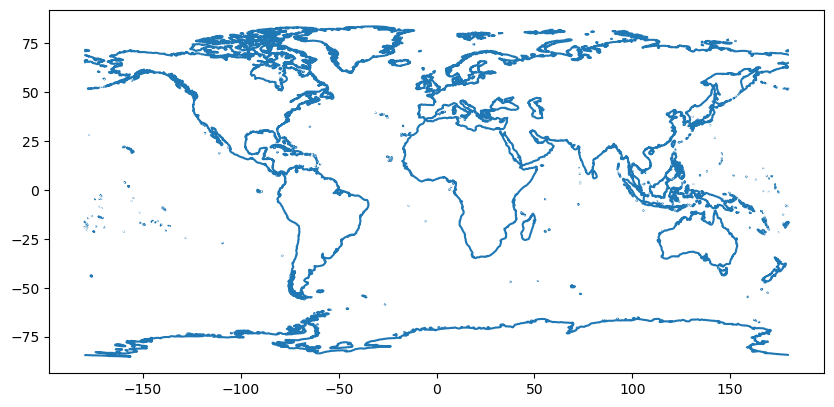

In [22]:
# Create a Matplotlib figure object
f, ax = plt.subplots(figsize=(10, 6))
coastlines.plot(ax=ax)
plt.show()

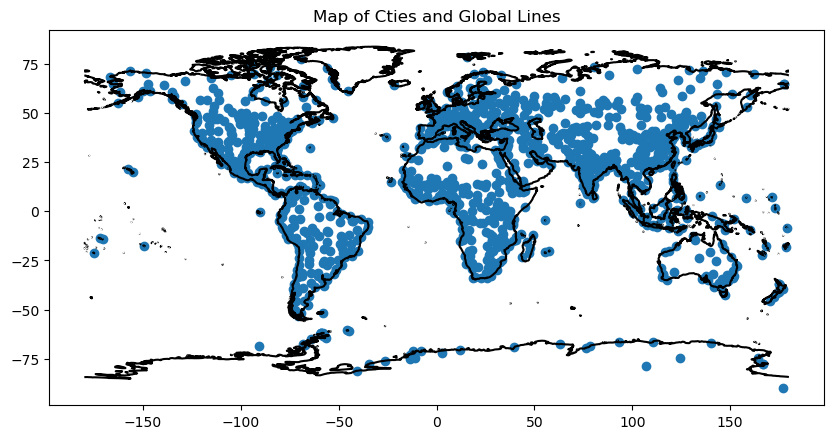

In [25]:
# Create a map or plot with two data layers
fig, ax = plt.subplots(figsize=(10, 6))
coastlines.plot(ax=ax, color="k")
cities.plot(ax=ax)
ax.set(title="Map of Cties and Global Lines")
plt.show()

## Challenge 2: Create a Global Map
Your goal is to create a map that contains 3 layer
1. the cities or populated places layer that you opened above
2. the coastlines layer that you opened above and
3. the countries layer that you will open using the code below


In [27]:
# Create a path with the countries shapefile
countries_path = os.path.join(
    "data",
    "earthpy-downloads",
    "ne_50m_admin_0_countries",
    "ne_50m_admin_0_countries.shp",
)

countries = gpd.read_file(countries_path)
countries.head()

,featurecla,scalerank,LABELRANK,SOVEREIGNT,SOV_A3,ADM0_DIF,LEVEL,TYPE,TLC,ADMIN,...,FCLASS_TR,FCLASS_ID,FCLASS_PL,FCLASS_GR,FCLASS_IT,FCLASS_NL,FCLASS_SE,FCLASS_BD,FCLASS_UA,geometry
0,Admin-0 country,1,3,Zimbabwe,ZWE,0,2,Sovereign country,1,Zimbabwe,...,None,None,None,None,None,None,None,None,None,"POLYGON ((31.28789 -22.40205, 31.19727 -22.344..."
1,Admin-0 country,1,3,Zambia,ZMB,0,2,Sovereign country,1,Zambia,...,None,None,None,None,None,None,None,None,None,"POLYGON ((30.39609 -15.64307, 30.25068 -15.643..."
2,Admin-0 country,1,3,Yemen,YEM,0,2,Sovereign country,1,Yemen,...,None,None,None,None,None,None,None,None,None,"MULTIPOLYGON (((53.08564 16.64839, 52.58145 16..."
3,Admin-0 country,3,2,Vietnam,VNM,0,2,Sovereign country,1,Vietnam,...,None,None,None,None,None,None,None,None,None,"MULTIPOLYGON (((104.06396 10.39082, 104.08301 ..."
4,Admin-0 country,5,3,Venezuela,VEN,0,2,Sovereign country,1,Venezuela,...,None,None,None,None,None,None,None,None,None,"MULTIPOLYGON (((-60.82119 9.13838, -60.94141 9..."


[Text(0.5, 1.0, 'Map os Cities,Countries and Coastlines')]

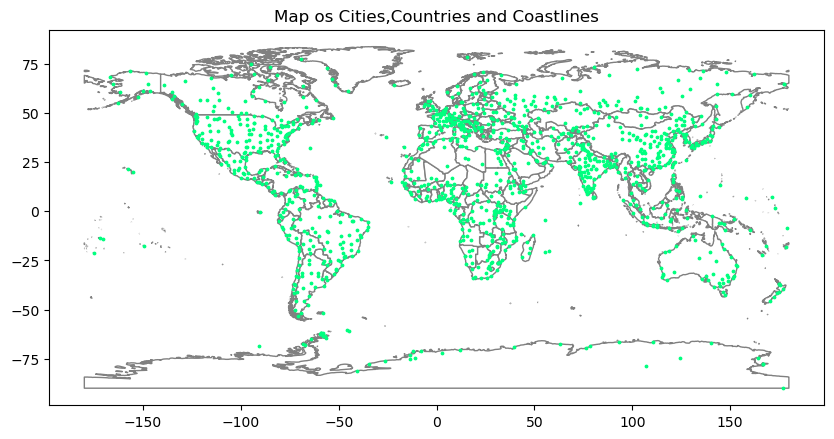

In [41]:
fig, ax = plt.subplots(figsize=(10, 6))
countries.plot(ax=ax, color="w", edgecolor="grey")
cities.plot(ax=ax, color="springgreen", markersize=3)
ax.set(title="Map os Cities,Countries and Coastlines")

### **Spatial Data Attributes**

In [70]:
countries.head()

,featurecla,scalerank,LABELRANK,SOVEREIGNT,SOV_A3,ADM0_DIF,LEVEL,TYPE,TLC,ADMIN,...,FCLASS_TR,FCLASS_ID,FCLASS_PL,FCLASS_GR,FCLASS_IT,FCLASS_NL,FCLASS_SE,FCLASS_BD,FCLASS_UA,geometry
0,Admin-0 country,1,3,Zimbabwe,ZWE,0,2,Sovereign country,1,Zimbabwe,...,None,None,None,None,None,None,None,None,None,"POLYGON ((31.28789 -22.40205, 31.19727 -22.344..."
1,Admin-0 country,1,3,Zambia,ZMB,0,2,Sovereign country,1,Zambia,...,None,None,None,None,None,None,None,None,None,"POLYGON ((30.39609 -15.64307, 30.25068 -15.643..."
2,Admin-0 country,1,3,Yemen,YEM,0,2,Sovereign country,1,Yemen,...,None,None,None,None,None,None,None,None,None,"MULTIPOLYGON (((53.08564 16.64839, 52.58145 16..."
3,Admin-0 country,3,2,Vietnam,VNM,0,2,Sovereign country,1,Vietnam,...,None,None,None,None,None,None,None,None,None,"MULTIPOLYGON (((104.06396 10.39082, 104.08301 ..."
4,Admin-0 country,5,3,Venezuela,VEN,0,2,Sovereign country,1,Venezuela,...,None,None,None,None,None,None,None,None,None,"MULTIPOLYGON (((-60.82119 9.13838, -60.94141 9..."


In [44]:
# View first 5 rows of GeoDataFrame
cities.head()

,scalerank,natscale,labelrank,featurecla,name,namepar,namealt,nameascii,adm0cap,capalt,...,pop_max,pop_min,pop_other,rank_max,rank_min,meganame,ls_name,min_zoom,ne_id,geometry
0,10,1,5,Admin-1 region capital,Bombo,None,None,Bombo,0,0,...,75000,21000,0.0,8,7,None,None,7.0,1159113923,POINT (32.5333 0.5833)
1,10,1,5,Admin-1 region capital,Fort Portal,None,None,Fort Portal,0,0,...,42670,42670,0.0,7,7,None,None,7.0,1159113959,POINT (30.275 0.671)
2,10,1,3,Admin-1 region capital,Potenza,None,None,Potenza,0,0,...,69060,69060,0.0,8,8,None,None,7.0,1159117259,POINT (15.799 40.642)
3,10,1,3,Admin-1 region capital,Campobasso,None,None,Campobasso,0,0,...,50762,50762,0.0,8,8,None,None,7.0,1159117283,POINT (14.656 41.563)
4,10,1,3,Admin-1 region capital,Aosta,None,None,Aosta,0,0,...,34062,34062,0.0,7,7,None,None,7.0,1159117361,POINT (7.315 45.737)


In [45]:
# View data just in pop_max column of the cities object
cities.pop_max

0          75000
1          42670
2          69060
3          50762
4          34062
          ...   
1246    11748000
1247    18845000
1248     4630000
1249     5183700
1250     7206000
Name: pop_max, Length: 1251, dtype: int64

In [51]:
countries["POP_EST"]

0      14645468.0
1      17861030.0
2      29161922.0
3      96462106.0
4      28515829.0
          ...    
237    38041754.0
238        6000.0
239        4490.0
240       40733.0
241       11646.0
Name: POP_EST, Length: 242, dtype: float64

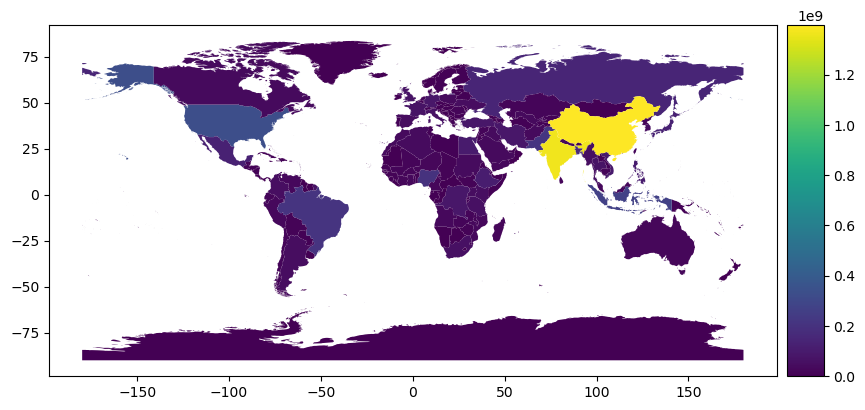

In [56]:
from mpl_toolkits.axes_grid1 import make_axes_locatable

fig, ax = plt.subplots(figsize=(10, 6))
divider = make_axes_locatable(ax)
cax = divider.append_axes("right", size="5%", pad=0.1)

countries.plot(column="POP_EST", ax=ax, cax=cax, legend=True)
plt.show()

### Challenge: Plot Cities Data
Plot the cities object so each point is colored according to the max population value


<Axes: >

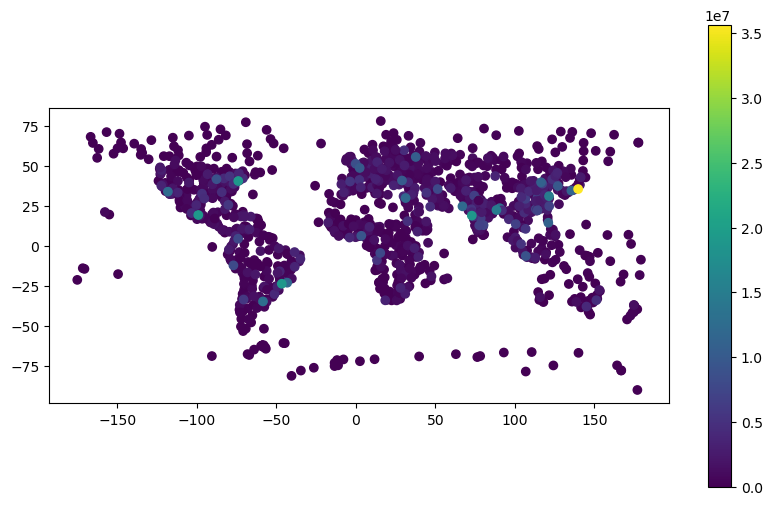

In [58]:
fig, ax = plt.subplots(figsize=(10, 6))
cities.plot(column="pop_max", ax=ax, legend=True)

 ### Challenge: Plot Cities Data Using Quantiles – Categorical Plot
 You can plot your data according to categorical groups similar to what you might do in a tool like ArcGIS or QGIS. See what happens when you customize your plot code above.

Set the following parameters:

legend=True and
scheme="quantiles

<Axes: >

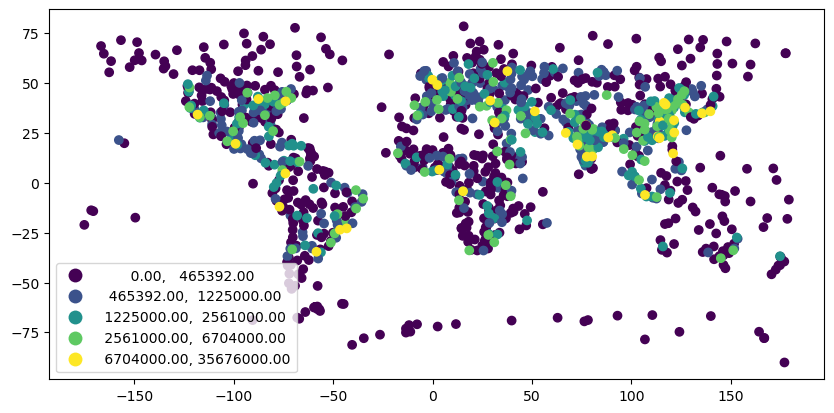

In [65]:
fig, ax = plt.subplots(figsize=(10, 6))
cities.plot(column="pop_max", ax=ax, legend=True, scheme="jenks_caspall")

<Axes: >

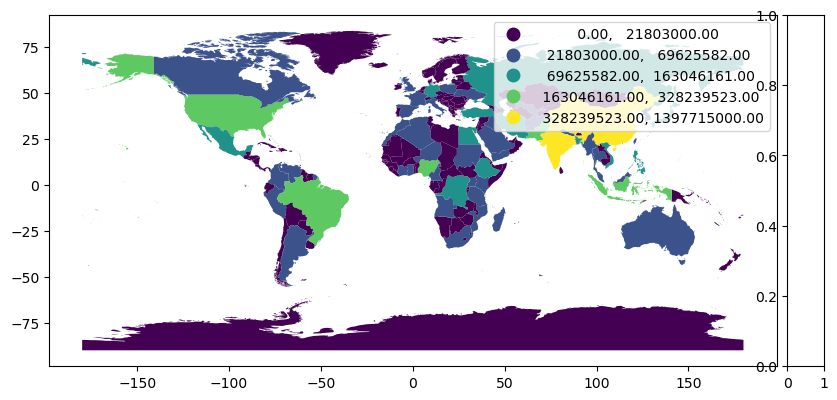

In [69]:
fig, ax = plt.subplots(figsize=(10, 6))
divider = make_axes_locatable(ax)
cax = divider.append_axes("right", size="5%", pad=0.1)
countries.plot(column="POP_EST", ax=ax, legend=True, cax=cax, scheme="fisher_jenks")

### Optional: Geoprocessing Vector Data Geoprocessing in Python: Clip Data
1. you subset the countries layer to just the boundary of the United State of America
2. you then plot the data to look at the newly subsetted data!
3. Finally you clip the cities data to only include cities that fall within the boundary of the United States

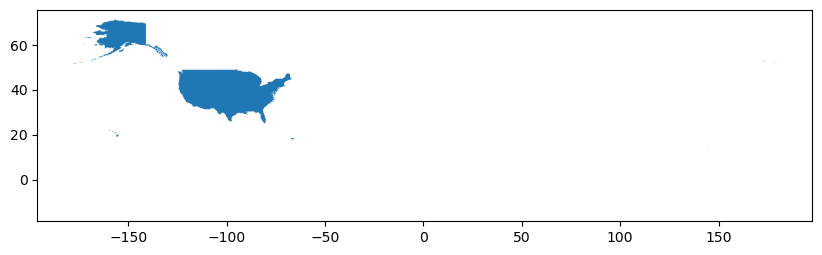

In [71]:
# Subsete the countries data to just a single one
united_states_boundary = countries.loc[
    countries["SOVEREIGNT"] == "United States of America"
]

# Notice in the plot that only the boundary for the USA is in the new variable
fig, ax = plt.subplots(figsize=(10, 6))
united_states_boundary.plot(ax=ax)
plt.show()

C:\Users\Gabriel\AppData\Local\Temp\ipykernel_26812\3237415879.py:7: UserWarning: FigureCanvasAgg is non-interactive, and thus cannot be shown
  fig.show()


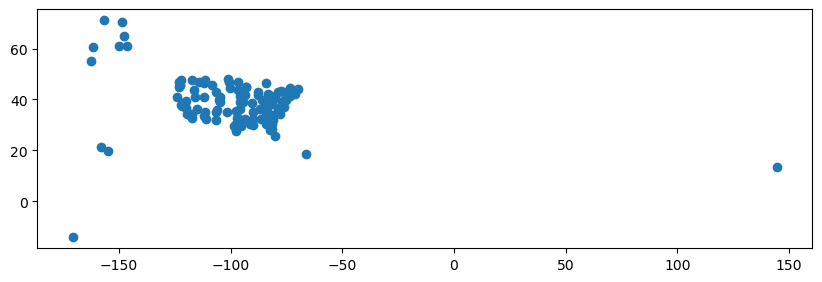

In [72]:
# Clip the cities data for the USA boundary usign GEOPANDAS
cities_usa = gpd.clip(cities, united_states_boundary)

# Plot the final clipped data
fig, ax = plt.subplots(figsize=(10, 6))
cities_usa.plot(ax=ax)
fig.show()

### BONUS Challenge: Clip Vector Data in Python

C:\Users\Gabriel\AppData\Local\Temp\ipykernel_26812\1462801342.py:12: UserWarning: FigureCanvasAgg is non-interactive, and thus cannot be shown
  fig.show()


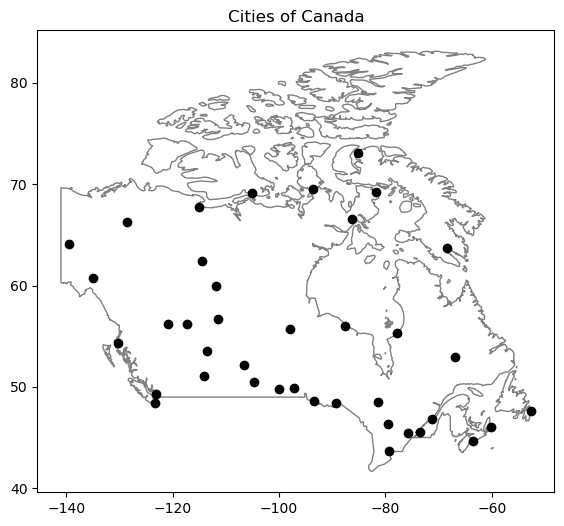

In [77]:
# Subset canada boundary from the countries data
canada_boundary = countries.loc[countries["SOVEREIGNT"] == "Canada"]

cities_canada = gpd.clip(cities, canada_boundary)

# Plot Canada Boundary
fig, ax = plt.subplots(figsize=(10, 6))
canada_boundary.plot(ax=ax, color="w", edgecolor="gray")
cities_canada.plot(ax=ax, color="k")
ax.set(title="Cities of Canada")

fig.show()